<a href="https://colab.research.google.com/github/legardajuanpablo-byte/DataScienceProjectDegree_JuanPablo_Legarda.ipynb/blob/main/sesiones_practicas/sp_3_JuanPablo_Legarda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.


Varianza explicada: PC1=68.8%  |  PC2=19.3%  |  Total=88.2%

Cargas (loadings):
                     PC1    PC2
bill_length_mm     0.455  0.597
bill_depth_mm     -0.400  0.798
flipper_length_mm  0.576  0.002
body_mass_g        0.548  0.084

Ecuaciones de los componentes (con z = variables estandarizadas):
PC1 = +0.455·z(bill_length_mm) -0.400·z(bill_depth_mm) +0.576·z(flipper_length_mm) +0.548·z(body_mass_g)
PC2 = +0.597·z(bill_length_mm) +0.798·z(bill_depth_mm) +0.002·z(flipper_length_mm) +0.084·z(body_mass_g)

Cargas (loadings):
                     PC1    PC2
bill_length_mm     0.455  0.597
bill_depth_mm     -0.400  0.798
flipper_length_mm  0.576  0.002
body_mass_g        0.548  0.084

Ecuaciones de los componentes (con z = variables estandarizadas):
PC1 = +0.455·z(bill_length_mm) -0.400·z(bill_depth_mm) +0.576·z(flipper_length_mm) +0.548·z(body_mass_g)
PC2 = +0.597·z(bill_length_mm) +0.798·z(bill_depth_mm) +0.002·z(flipper_length_mm) +0.084·z(body_mass_g)


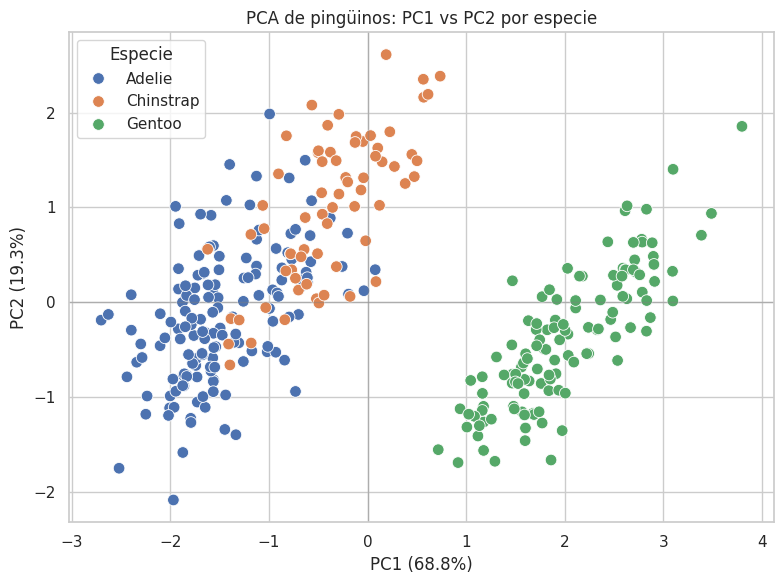

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme(style="whitegrid")

# 1. Cargar dataset real
penguins = sns.load_dataset("penguins")

# 2. Seleccionar variables y limpiar
vars_morf = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df = penguins[["species"] + vars_morf].dropna().reset_index(drop=True)
df.head()
X = df[vars_morf].values
scaler = StandardScaler()
Z = scaler.fit_transform(X)   # variables estandarizadas (z-scores)
# 4. Aplicar PCA (obtenemos todas y luego usamos 2 para graficar)
pca = PCA(n_components=2, random_state=0)
PC = pca.fit_transform(Z)

exp_var = pca.explained_variance_ratio_
print(f"Varianza explicada: PC1={exp_var[0]*100:.1f}%  |  PC2={exp_var[1]*100:.1f}%  |  Total={exp_var.sum()*100:.1f}%")
# 5. Ecuaciones: PC_k = sum_j (loading_kj * z_j)
loadings = pd.DataFrame(
    pca.components_.T,
    index=vars_morf,
    columns=["PC1","PC2"]
)
print("\nCargas (loadings):")
print(loadings.round(3))

def ecuacion_pc(nombre_pc):
    coefs = loadings[nombre_pc]
    partes = [f"{coef:+.3f}·z({var})" for var, coef in coefs.items()]
    return f"{nombre_pc} = " + " ".join(partes)

print("\nEcuaciones de los componentes (con z = variables estandarizadas):")
print(ecuacion_pc("PC1"))
print(ecuacion_pc("PC2"))
# 5. Ecuaciones: PC_k = sum_j (loading_kj * z_j)
loadings = pd.DataFrame(
    pca.components_.T,
    index=vars_morf,
    columns=["PC1","PC2"]
)
print("\nCargas (loadings):")
print(loadings.round(3))

def ecuacion_pc(nombre_pc):
    coefs = loadings[nombre_pc]
    partes = [f"{coef:+.3f}·z({var})" for var, coef in coefs.items()]
    return f"{nombre_pc} = " + " ".join(partes)

print("\nEcuaciones de los componentes (con z = variables estandarizadas):")
print(ecuacion_pc("PC1"))
print(ecuacion_pc("PC2"))
# 6. DataFrame con PCs para graficar
plot_df = pd.DataFrame({
    "PC1": PC[:,0],
    "PC2": PC[:,1],
    "species": df["species"]
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="species", s=70, edgecolor="white", linewidth=0.6)
plt.axhline(0, color="gray", lw=1, alpha=0.4); plt.axvline(0, color="gray", lw=1, alpha=0.4)
plt.xlabel(f"PC1 ({exp_var[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({exp_var[1]*100:.1f}%)")
plt.title("PCA de pingüinos: PC1 vs PC2 por especie")
plt.legend(title="Especie")
plt.tight_layout()
plt.show()


Interpretación de PC1 vs PC2 en pingüinos

- Se distinguen tres nubes claras. La verde (Gentoo) aparece separada hacia la derecha, lo que sugiere individuos de mayor tamaño (aleta más larga y mayor masa). Un punto ubicado cerca de PC1 entre 2 y 3 y PC2 alrededor de −0.5 a 1 casi siempre corresponde a Gentoo. Un punto verde muy a la izquierda sería un caso atípico o una posible medición inusual.

- En la zona izquierda se superponen la azul (Adelie) y la naranja (Chinstrap). Allí PC1 no basta para distinguirlas, por eso conviene observar PC2: valores altos de PC2, por ejemplo PC1 ≈ −1 y PC2 ≈ 1.0, suelen ser Chinstrap (picos más largos y delgados); valores bajos de PC2, por ejemplo PC1 ≈ −1.5 y PC2 ≈ −0.5, suelen ser Adelie (picos más cortos y profundos). En la franja cercana a PC2 ≈ 0 se mezclan con más frecuencia, por lo que allí habría más confusiones al clasificar.



### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 4.411e+04
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:49:31   Log-Likelihood:            -3.7649e+05
No. Observations:               43136   AIC:                         7.530e+05
Df Residuals:                   43129   BIC:                         7.531e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.131e+04    500.442     42.575      0.0

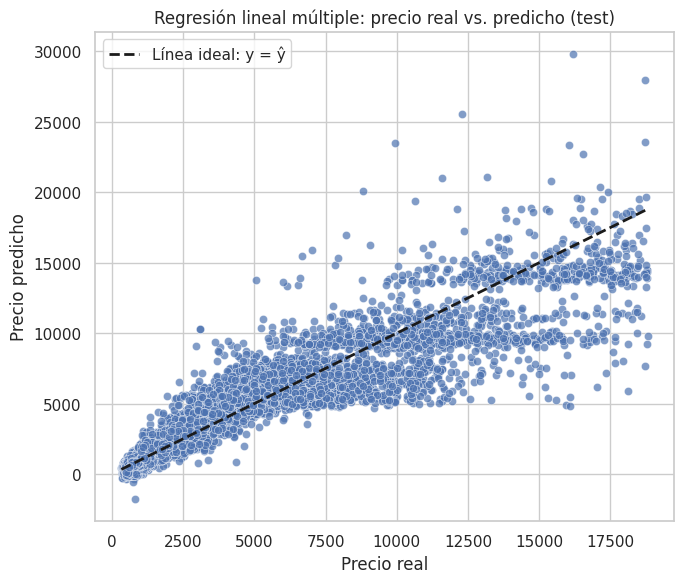

In [4]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="whitegrid")

# 1) Carga del dataset
diamonds = sns.load_dataset("diamonds")

# 2) Selección de variables y limpieza mínima (dimensiones físicas > 0)
vars_pred = ["carat", "depth", "table", "x", "y", "z"]
df = diamonds[["price"] + vars_pred].dropna()
df = df[(df[["x", "y", "z"]] > 0).all(axis=1)]

# 3) División Train/Test
train, test = train_test_split(df, test_size=0.20, random_state=770674)

# 4) Ajuste del modelo OLS con statsmodels
formula = "price ~ carat + depth + table + x + y + z"
model = smf.ols(formula, data=train).fit()

# 5) Resumen del modelo (coeficientes, p-valores, R², etc.)
print(model.summary())

# 6) Evaluación en TEST (RMSE y R²)
y_true = test["price"]
y_pred = model.predict(test)

# Bloque agregado: RMSE versión-agnóstica (sin 'squared=False')
mse  = mean_squared_error(y_true, y_pred)   # MSE
rmse = float(np.sqrt(mse))                  # RMSE


r2 = r2_score(y_true, y_pred)
print(f"\nMSE  (test): {mse:.2f}")
print(f"RMSE (test): {rmse:.2f}")
print(f"R²   (test): {r2:.3f}")

# 7) Ecuación del modelo con coeficientes estimados
coefs = model.params
ecuacion = f"price = {coefs['Intercept']:.2f}"
for v in vars_pred:
    ecuacion += f" + ({coefs[v]:.2f})·{v}"
print("\nEcuación del modelo:")
print(ecuacion)

# 8) Gráfico: valores reales vs. predichos
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_true, y=y_pred, s=35, alpha=0.7, edgecolor="white", linewidth=0.4)
mn, mx = y_true.min(), y_true.max()
plt.plot([mn, mx], [mn, mx], "k--", lw=2, label="Línea ideal: y = ŷ")
plt.title("Regresión lineal múltiple: precio real vs. predicho (test)")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.legend()
plt.tight_layout()
plt.show()



El gráfico muestra que el modelo de regresión tiene un buen desempeño en la predicción de precios, ya que la mayoría de los puntos se concentran cerca de la línea ideal (y = x), reflejando coherencia entre valores reales y predichos; sin embargo, se observa una dispersión mayor en los precios altos, lo que indica que el modelo tiende a perder precisión en escenarios de valores elevados.
